### Project:

Amazon is a popular e-commerce platform where books are sold. Unravel what types of books were bought frequently, between 2009 and 2019. To find this, juxtapose between the number of books displayed for sale, and the types of books bought frequently by consumers

### Solution:

We have to scrap the data from the website since the dataset wasn't provided for the project already. This will be done using Python Libraries
Link to website: https://www.amazon.com/s?k=amazon+shopping+online&rh=n%3A283155&dc&adgrpid=84486094307&gclid=CjwKCAjwwab7BRBAEiwAapqpTDYtTN8aym2q_rlYn1VdmofKw0_bzkd6xjaCl8cMY4syjbPZMKNMjxoCLIYQAvD_BwE&hvadid=393524136919&hvdev=c&hvlocphy=1010294&hvnetw=g&hvqmt=b&hvrand=2170543926145783317&hvtargid=kwd-469356929&hydadcr=22365_10729094&qid=1600780278&rnid=2941120011&tag=hydglogoo-20&ref=sr_nr_n_10

### Importing libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import csv
import requests
from selenium import webdriver
%matplotlib inline

### Start the webdriver

In [2]:
driver = webdriver.Chrome(executable_path=r"C:/Users/agyei/Downloads/chromedriver.exe")

C:\Users\agyei\AppData\Local\Temp\ipykernel_9508\3417129209.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"C:/Users/agyei/Downloads/chromedriver.exe")


### Retrieving Bestsellers from 2009 to 2019

In [3]:
# base url for web scraping
url_start = 'https://www.amazon.com/gp/bestsellers/{}/books/ref=zg_bsar_cal_ye'

In [4]:
# years under review
years = list(range(2009,2020))

In [10]:
# extracting info for each year
for year in years:
    url = url_start.format(year)
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    results = soup.find_all('div', {'data-a-card-type': 'basic'})
    
    # extracting info per year
    def extract_info(item):
        try:
            #description 
            atag =item.span
            description = atag.text.strip()
            title = item.find('div', {'class':'_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y'}).text    
            author = item.find('div', 'a-row a-size-small').text
        except AttributeError:
            description = ''
            title = ''
            atag = ''
            author = ''
        try: 
            #price
            price_parent = item.find('span', 'a-size-base a-color-price')
            price = price_parent.find('span', '_cDEzb_p13n-sc-price_3mJ9Z').text.replace('$','').strip()
        except AttributeError:
            price = ''
            
        try:
            #rank and rating
            rating= item.i.text
            review_count = item.find('span', {'class': 'a-size-small'}).text
        except AttributeError:
            rating = ''
            review_count = ''

        #cover
        cover = item.find('span', 'a-size-small a-color-secondary a-text-normal').text       

        result = (description, title , author, price, rating, review_count, cover)

        return result
    
    # saving extracted info to csv
    records = []
    results = soup.find_all('div', {'data-a-card-type': 'basic'})
    
    for item in results:
        records.append(extract_info(item))

        with open('results{}.csv'.format(year), 'w', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerow(['Description', 'Title', 'Author', 'Price', 'Rating', 'ReviewCount', 'Cover'])
            writer.writerows(records)

WebDriverException: Message: unknown error: net::ERR_NAME_NOT_RESOLVED
  (Session info: chrome=109.0.5414.120)
Stacktrace:
Backtrace:
	(No symbol) [0x0096F243]
	(No symbol) [0x008F7FD1]
	(No symbol) [0x007ED04D]
	(No symbol) [0x007E9152]
	(No symbol) [0x007E044D]
	(No symbol) [0x007E12EF]
	(No symbol) [0x007E071D]
	(No symbol) [0x007DFB0B]
	(No symbol) [0x007DFA5C]
	(No symbol) [0x007DE7E8]
	(No symbol) [0x007DEDC2]
	(No symbol) [0x007EEA5B]
	(No symbol) [0x0084D187]
	(No symbol) [0x0083858C]
	(No symbol) [0x0084C9EB]
	(No symbol) [0x00838386]
	(No symbol) [0x0081163C]
	(No symbol) [0x0081269D]
	GetHandleVerifier [0x00C09A22+2655074]
	GetHandleVerifier [0x00BFCA24+2601828]
	GetHandleVerifier [0x00A18C0A+619850]
	GetHandleVerifier [0x00A17830+614768]
	(No symbol) [0x009005FC]
	(No symbol) [0x00905968]
	(No symbol) [0x00905A55]
	(No symbol) [0x0091051B]
	BaseThreadInitThunk [0x761A7D69+25]
	RtlInitializeExceptionChain [0x7781BB9B+107]
	RtlClearBits [0x7781BB1F+191]


### 

### Exploratory Data Analysis

In [50]:
combined_data = pd.DataFrame()
for year in years:
    df = pd.read_csv('results{}.csv'.format(year))
    
    #   add year column to data
    df['Year'] = year
    
    #     dropping first row of each year
    df.drop(labels = 'Description', axis = 1, inplace = True)
    df.drop(index = 0, axis = 0, inplace = True)
    
    
    #   combine all data into one dataframe
    combined_data = pd.concat([combined_data, df]) 

In [65]:
# reset index
combined_data.reset_index(inplace = True)

In [66]:
# dropping index column
combined_data.drop(labels = 'index', axis = 1, inplace = True)

In [70]:
# renaming price column
combined_data = combined_data.rename(columns = {'Price' : 'Price($)'})

In [71]:
# first 5 data
combined_data.head()

,Title,Author,Price($),Rating,ReviewCount,Cover,Year
0,The Lost Symbol,Dan Brown,14.20,4.4 out of 5 stars,"17,092",Hardcover,2009
1,The Shack: Where Tragedy Confronts Eternity,William P. Young,10.43,4.7 out of 5 stars,"23,923",Paperback,2009
2,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,13.54,4.8 out of 5 stars,"5,063",Hardcover,2009
3,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,19.48,4.7 out of 5 stars,"17,738",Hardcover,2009
4,Going Rogue: An American Life,Sarah Palin,9.54,4.6 out of 5 stars,"1,572",Hardcover,2009


In [72]:
combined_data.tail()

,Title,Author,Price($),Rating,ReviewCount,Cover,Year
325,Howard Stern Comes Again,Howard Stern,17.50,4.5 out of 5 stars,"8,026",Hardcover,2019
326,Guts: A Graphic Novel,Raina Telgemeier,6.24,4.8 out of 5 stars,"12,487",Paperback,2019
327,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,8.87,4.5 out of 5 stars,Marie Kondō,Hardcover,2019
328,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,29.98,4.9 out of 5 stars,"25,676",Hardcover,2019
329,National Geographic Little Kids First Big Book...,Amy Shields,13.33,4.8 out of 5 stars,"18,372",Hardcover,2019


In [81]:
# finding null values
combined_data.isnull().sum()

Title           1
Author          1
Price($)       15
Rating          0
ReviewCount     0
Cover           0
Year            0
dtype: int64

In [84]:
combined_data['Price($)'].nunique()

187

In [87]:
# accessing null values to see their nature
combined_data.loc[combined_data.isnull().any(axis = 1)]

,Title,Author,Price($),Rating,ReviewCount,Cover,Year
12,Glenn Beck's Common Sense: The Case Against an...,Glenn Beck,NaN,4.5 out of 5 stars,"1,422",Paperback,2009
48,Life,Keith Richards,NaN,4.6 out of 5 stars,"4,901",Hardcover,2010
51,The Official SAT Study Guide,The College Board,NaN,4.4 out of 5 stars,The College Board,Paperback,2010
79,The Official SAT Study Guide,The College Board,NaN,4.4 out of 5 stars,The College Board,Paperback,2011
86,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,NaN,4.7 out of 5 stars,"4,890",Paperback,2011
103,The Official SAT Study Guide,The College Board,NaN,4.4 out of 5 stars,The College Board,Paperback,2012
110,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,NaN,4.7 out of 5 stars,"4,890",Paperback,2012
132,The Official SAT Study Guide,The College Board,NaN,4.4 out of 5 stars,The College Board,Paperback,2013
136,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,NaN,4.7 out of 5 stars,"4,890",Paperback,2013
151,Frozen (Little Golden Book),RH Disney,NaN,4.8 out of 5 stars,RH Disney,Hardcover,2014


<AxesSubplot:>

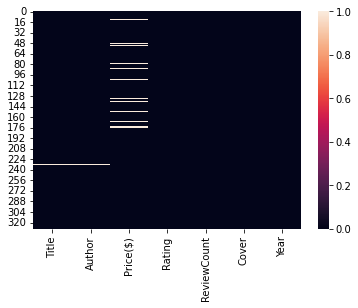

In [ ]:
sns.heatmap(combined_data.isnull)

### Univariate Analysis

### Analysis of Authors

#### Author with most books sold in 2009

In [99]:
#authors with most books in list in the years
books = combined_data['Author'].value_counts().to_frame()
books = books.head(15)
books

,Author
Jeff Kinney,11
Suzanne Collins,10
Gallup,9
Gary Chapman,9
Stephenie Meyer,7
Dr. Seuss,7
Rob Elliott,7
American Psychological Association,6
The College Board,6
E L James,5


#### Total number of authors

In [100]:
combined_data['Author'].nunique()

157

In [150]:
grouped_authors = combined_data.groupby('Year')['Author'].value_counts().to_frame()

In [152]:
grouped_authors

Author
Year Author                                    
2009 Stephenie Meyer                          6
     Glenn Beck                               2
     American Psychological Association       1
     Audrey Niffenegger                       1
     Charlaine Harris                         1
...                                         ...
2019 Michelle Obama                           1
     Raina Telgemeier                         1
     Samin Nosrat                             1
     School Zone                              1
     Tara Westover                            1

[294 rows x 1 columns]